# Back Lit Image Enhancement

In [ ]:
import numpy as np


def to_32F(image):
    if image.max() > 1.0:
        image = image / 255.0
    return np.clip(np.float32(image), 0, 1)


def to_8U(image):
    if image.max() <= 1.0:
        image = image * 255.0
    return np.clip(np.uint8(image), 0, 255)

In [ ]:
import numpy as np


def padding_constant(image, pad_size, constant_value=0):
    """
    Padding with constant value.

    Parameters
    ----------
    image: NDArray
        Image to padding. Only support 2D(gray) or 3D(color)
    pad_size: tuple
        Padding size for height and width axis respectively

    Returns
    -------
    ret: NDArray
        Image after padding
    """
    shape = image.shape
    assert len(shape) in [2, 3], 'image must be 2D or 3D'

    is_3D = True
    if len(shape) == 2:
        image = np.expand_dims(image, axis=2)
        shape = image.shape
        is_3D = False

    h, w = pad_size
    ret = np.zeros((shape[0]+2*h, shape[1]+2*w, shape[2]))
    ret[h:-h, w:-w, :] = image

    ret[:h, :, :] = constant_value
    ret[-h:, :, :] = constant_value
    ret[:, :w, :] = constant_value
    ret[:, -w:, :] = constant_value
    return ret if is_3D else np.squeeze(ret, axis=2)


def padding_reflect(image, pad_size):
    """
    Padding with reflection to image by boarder

    Parameters
    ----------
    image: NDArray
        Image to padding. Only support 2D(gray) or 3D(color)
    pad_size: tuple
        Padding size for height adn width axis respectively

    Returns
    -------
    ret: NDArray
        Image after padding
    """
    shape = image.shape
    assert len(shape) in [2, 3], 'image must be 2D or 3D'

    is_3D = True
    if len(shape) == 2:
        image = np.expand_dims(image, axis=2)
        shape = image.shape
        is_3D = False

    h, w = pad_size
    ret = np.zeros((shape[0]+2*h, shape[1]+2*w, shape[2]))

    for i in range(shape[0]+2*h):
        for j in range(shape[1]+2*w):
            if i < h:
                if j < w:
                    ret[i, j, :] = image[h-1-i, w-1-j, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[h-1-i, j-w, :]
                else:
                    ret[i, j, :] = image[h-1-i, w+2*shape[1]-1-j, :]
            elif h <= i <= h + shape[0] - 1:
                if j < w:
                    ret[i, j, :] = image[i-h, w-1-j, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[i-h, j-w, :]
                else:
                    ret[i, j, :] = image[i-h, w+2*shape[1]-1-j, :]
            else:
                if j < w:
                    ret[i, j, :] = image[h+2*shape[0]-1-i, w-1-j, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[h+2*shape[0]-1-i, j-w, :]
                else:
                    ret[i, j, :] = image[h+2*shape[0]-1-i, w+2*shape[1]-1-j, :]

    return ret if is_3D else np.squeeze(ret, axis=2)


def padding_reflect_101(image, pad_size):
    """
    Padding with reflection to image by boarder

    Parameters
    ----------
    image: NDArray
        Image to padding. Only support 2D(gray) or 3D(color)
    pad_size: tuple
        Padding size for height adn width axis respectively

    Returns
    -------
    ret: NDArray
        Image after padding
    """
    shape = image.shape
    assert len(shape) in [2, 3], 'image must be 2D or 3D'

    is_3D = True
    if len(shape) == 2:
        image = np.expand_dims(image, axis=2)
        shape = image.shape
        is_3D = False

    h, w = pad_size
    ret = np.zeros((shape[0]+2*h, shape[1]+2*w, shape[2]))

    for i in range(shape[0]+2*h):
        for j in range(shape[1]+2*w):
            if i < h:
                if j < w:
                    ret[i, j, :] = image[h-i, w-j, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[h-i, j-w, :]
                else:
                    ret[i, j, :] = image[h-i, w+2*shape[1]-2-j, :]
            elif h <= i <= h + shape[0] - 1:
                if j < w:
                    ret[i, j, :] = image[i-h, w-j, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[i-h, j-w, :]
                else:
                    ret[i, j, :] = image[i-h, w+2*shape[1]-2-j, :]
            else:
                if j < w:
                    ret[i, j, :] = image[h+2*shape[0]-2-i, w-j, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[h+2*shape[0]-2-i, j-w, :]
                else:
                    ret[i, j, :] = image[h+2*shape[0]-2-i, w+2*shape[1]-2-j, :]

    return ret if is_3D else np.squeeze(ret, axis=2)


def padding_edge(image, pad_size):
    """
    Padding with edge

    Parameters
    ----------
    image: NDArray
        Image to padding. Only support 2D(gray) or 3D(color)
    pad_size: tuple
        Padding size for height adn width axis respectively

    Returns
    -------
    ret: NDArray
        Image after padding
    """
    shape = image.shape
    assert len(shape) in [2, 3], 'image must be 2D or 3D'

    is_3D = True
    if len(shape) == 2:
        image = np.expand_dims(image, axis=2)
        shape = image.shape
        is_3D = False

    h, w = pad_size
    ret = np.zeros((shape[0]+2*h, shape[1]+2*w, shape[2]))

    for i in range(shape[0]+2*h):
        for j in range(shape[1]+2*w):
            if i < h:
                if j < w:
                    ret[i, j, :] = image[0, 0, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[0, j-w, :]
                else:
                    ret[i, j, :] = image[0, shape[1]-1, :]
            elif h <= i <= h + shape[0] - 1:
                if j < w:
                    ret[i, j, :] = image[i-h, 0, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[i-h, j-w, :]
                else:
                    ret[i, j, :] = image[i-h, shape[1]-1, :]
            else:
                if j < w:
                    ret[i, j, :] = image[shape[0]-1, 0, :]
                elif w <= j <= w + shape[1] - 1:
                    ret[i, j, :] = image[shape[0]-1, j-w, :]
                else:
                    ret[i, j, :] = image[shape[0]-1, shape[1]-1, :]

    return ret if is_3D else np.squeeze(ret, axis=2)



In [ ]:
import numpy as np

def box_filter(I, r, normalize=True, border_type='reflect_101'):
    """

    Parameters
    ----------
    I: NDArray
        Input should be 3D with format of HWC
    r: int
        radius of filter. kernel size = 2 * r + 1
    normalize: bool
        Whether to normalize
    border_type: str
        Border type for padding, includes:
        edge        :   aaaaaa|abcdefg|gggggg
        zero        :   000000|abcdefg|000000
        reflect     :   fedcba|abcdefg|gfedcb
        reflect_101 :   gfedcb|abcdefg|fedcba

    Returns
    -------
    ret: NDArray
        Output has same shape with input
    """
    I = I.astype(np.float32)
    shape = I.shape
    assert len(shape) in [2, 3], \
        "I should be NDArray of 2D or 3D, not %dD" % len(shape)
    is_3D = True

    if len(shape) == 2:
        I = np.expand_dims(I, axis=2)
        shape = I.shape
        is_3D = False

    (rows, cols, channels) = shape

    tmp = np.zeros(shape=(rows, cols+2*r, channels), dtype=np.float32)
    ret = np.zeros(shape=shape, dtype=np.float32)

    # padding
    if border_type == 'reflect_101':
        I = padding_reflect_101(I, pad_size=(r, r))
    elif border_type == 'reflect':
        I = padding_reflect(I, pad_size=(r, r))
    elif border_type == 'edge':
        I = padding_edge(I, pad_size=(r, r))
    elif border_type == 'zero':
        I = padding_constant(I, pad_size=(r, r), constant_value=0)
    else:
        raise NotImplementedError

    I_cum = np.cumsum(I, axis=0) # (rows+2r, cols+2r)
    tmp[0, :, :] = I_cum[2*r, :, :]
    tmp[1:rows, :, :] = I_cum[2*r+1:2*r+rows, :, :] - I_cum[0:rows-1, :, :]

    I_cum = np.cumsum(tmp, axis=1)
    ret[:, 0, :] = I_cum[:, 2*r, :]
    ret[:, 1:cols, :] = I_cum[:, 2*r+1:2*r+cols, :] - I_cum[:, 0:cols-1, :]
    if normalize:
        ret /= float((2*r+1) ** 2)

    return ret if is_3D else np.squeeze(ret, axis=2)

def blur(I, r):
    """
    This method performs like cv2.blur().

    Parameters
    ----------
    I: NDArray
        Filtering input
    r: int
        Radius of blur filter

    Returns
    -------
    q: NDArray
        Blurred output of I.
    """
    ones = np.ones_like(I, dtype=np.float32)
    N = box_filter(ones, r)
    ret = box_filter(I, r)
    return ret


In [ ]:
# import requi9red module
import sys

import numpy as np


class GuidedFilter:
    """
    This is a factory class which builds guided filter
    according to the channel number of guided Input.
    The guided input could be gray image, color image,
    or multi-dimensional feature map.

    References:
        K.He, J.Sun, and X.Tang. Guided Image Filtering. TPAMI'12.
    """
    def __init__(self, I, radius, eps):
        """

        Parameters
        ----------
        I: NDArray
            Guided image or guided feature map
        radius: int
            Radius of filter
        eps: float
            Value controlling sharpness
        """
        if len(I.shape) == 2:
            self._Filter = GrayGuidedFilter(I, radius, eps)
        else:
            self._Filter = MultiDimGuidedFilter(I, radius, eps)

    def filter(self, p):
        """

        Parameters
        ----------
        p: NDArray
            Filtering input which is 2D or 3D with format
            HW or HWC

        Returns
        -------
        ret: NDArray
            Filtering output whose shape is same with input
        """
        p = to_32F(p)
        if len(p.shape) == 2:
            return self._Filter.filter(p)
        elif len(p.shape) == 3:
            channels = p.shape[2]
            ret = np.zeros_like(p, dtype=np.float32)
            for c in range(channels):
                ret[:, :, c] = self._Filter.filter(p[:, :, c])
            return ret


class GrayGuidedFilter:
    """
    Specific guided filter for gray guided image.
    """
    def __init__(self, I, radius, eps):
        """

        Parameters
        ----------
        I: NDArray
            2D guided image
        radius: int
            Radius of filter
        eps: float
            Value controlling sharpness
        """
        self.I = to_32F(I)
        self.radius = radius
        self.eps = eps

    def filter(self, p):
        """

        Parameters
        ----------
        p: NDArray
            Filtering input of 2D

        Returns
        -------
        q: NDArray
            Filtering output of 2D
        """
        # step 1
        meanI  = box_filter(I=self.I, r=self.radius)
        meanp  = box_filter(I=p, r=self.radius)
        corrI  = box_filter(I=self.I * self.I, r=self.radius)
        corrIp = box_filter(I=self.I * p, r=self.radius)
        # step 2
        varI   = corrI - meanI * meanI
        covIp  = corrIp - meanI * meanp
        # step 3
        a      = covIp / (varI + self.eps)
        b      = meanp - a * meanI
        # step 4
        meana  = box_filter(I=a, r=self.radius)
        meanb  = box_filter(I=b, r=self.radius)
        # step 5
        q = meana * self.I + meanb

        return q


class MultiDimGuidedFilter:
    """
    Specific guided filter for color guided image
    or multi-dimensional feature map.
    """
    def __init__(self, I, radius, eps):
        self.I = to_32F(I)
        self.radius = radius
        self.eps = eps

        self.rows = self.I.shape[0]
        self.cols = self.I.shape[1]
        self.chs  = self.I.shape[2]

    def filter(self, p):
        """

        Parameters
        ----------
        p: NDArray
            Filtering input of 2D

        Returns
        -------
        q: NDArray
            Filtering output of 2D
        """
        p_ = np.expand_dims(p, axis=2)

        meanI = box_filter(I=self.I, r=self.radius) # (H, W, C)
        meanp = box_filter(I=p_, r=self.radius) # (H, W, 1)
        I_ = self.I.reshape((self.rows*self.cols, self.chs, 1)) # (HW, C, 1)
        meanI_ = meanI.reshape((self.rows*self.cols, self.chs, 1)) # (HW, C, 1)

        corrI_ = np.matmul(I_, I_.transpose(0, 2, 1))  # (HW, C, C)
        corrI_ = corrI_.reshape((self.rows, self.cols, self.chs*self.chs)) # (H, W, CC)
        corrI_ = box_filter(I=corrI_, r=self.radius)
        corrI = corrI_.reshape((self.rows*self.cols, self.chs, self.chs)) # (HW, C, C)
        corrI = corrI - np.matmul(meanI_, meanI_.transpose(0, 2, 1))

        U = np.expand_dims(np.eye(self.chs, dtype=np.float32), axis=0)
        # U = np.tile(U, (self.rows*self.cols, 1, 1)) # (HW, C, C)

        left = np.linalg.inv(corrI + self.eps * U) # (HW, C, C)

        corrIp = box_filter(I=self.I*p_, r=self.radius) # (H, W, C)
        covIp = corrIp - meanI * meanp # (H, W, C)
        right = covIp.reshape((self.rows*self.cols, self.chs, 1)) # (HW, C, 1)

        a = np.matmul(left, right) # (HW, C, 1)
        axmeanI = np.matmul(a.transpose((0, 2, 1)), meanI_) # (HW, 1, 1)
        axmeanI = axmeanI.reshape((self.rows, self.cols, 1))
        b = meanp - axmeanI # (H, W, 1)
        a = a.reshape((self.rows, self.cols, self.chs))

        meana = box_filter(I=a, r=self.radius)
        meanb = box_filter(I=b, r=self.radius)

        meana = meana.reshape((self.rows*self.cols, 1, self.chs))
        meanb = meanb.reshape((self.rows*self.cols, 1, 1))
        I_ = self.I.reshape((self.rows*self.cols, self.chs, 1))

        q = np.matmul(meana, I_) + meanb
        q = q.reshape((self.rows, self.cols))

        return q


In [ ]:
import cv2
import numpy as np
import unittest

class TestBoxFilter(unittest.TestCase):

    def test_box_filter_reflect_101(self):
        I = np.array(range(1, 50)).reshape(7, 7).astype(np.float32)
        r = 2
        ret1 = box_filter(I, r, normalize=True)
        ret2 = cv2.blur(I, (5,5), borderType=cv2.BORDER_DEFAULT)
        self.assertTrue(np.array_equal(ret1, ret2))

    def test_box_filter_reflect(self):
        I = np.array(range(1, 50)).reshape(7, 7).astype(np.float32)
        r = 2
        ret1 = box_filter(I, r, normalize=True, border_type='reflect')
        ret2 = cv2.blur(I, (5,5), borderType=cv2.BORDER_REFLECT)
        self.assertTrue(np.array_equal(ret1, ret2))

    def test_box_filter_edge(self):
        I = np.array(range(1, 50)).reshape(7, 7).astype(np.float32)
        r = 2
        ret1 = box_filter(I, r, normalize=True, border_type='edge')
        ret2 = cv2.blur(I, (5,5), borderType=cv2.BORDER_REPLICATE)
        self.assertTrue(np.array_equal(ret1, ret2))

    def test_box_filter_zero(self):
        I = np.array(range(1, 50)).reshape(7, 7).astype(np.float32)
        r = 2
        ret1 = box_filter(I, r, normalize=True, border_type='zero')
        ret2 = cv2.blur(I, (5,5), borderType=cv2.BORDER_CONSTANT)
        self.assertTrue(np.array_equal(ret1, ret2))



In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=e969c7c3425f3f894ec763d4a09ee021a77ac8d31b5840bff733c4983c363ec6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import cv2
import numpy as np
import copy
import os
import sklearn
import skfuzzy as fuzz
import matplotlib
from skfuzzy import control as ctrl
import math

def nearestPowerOf2(N):
    a = int(math.log2(N))
    if 2**a == N:
        return N
    return int(2**(a + 1))

def mst_clustering(k, img):
    print(k)
    shape = img.shape
    pixels = img.reshape(shape[0]*shape[1])
    pixels = sorted(pixels)
    pixels.reverse()
    label_map = {}
    data_diff = []
    for i in range(len(pixels)-1):
        data_diff.append(pixels[i]-pixels[i+1])
    diff_dict = {}
    for i in range(len(data_diff)):
        diff_dict[data_diff[i]] = i
    data_diff = sorted(data_diff)
    data_diff.reverse()
    boundaries = []
    for i in range(k-1):
        pos = diff_dict[data_diff[i]]
        boundaries.append(pos)
    boundaries = sorted(boundaries)
    print(boundaries)

    print(len(boundaries))
    curr = 0
    for i in range(len(pixels)):
        if curr <k-1 and i>boundaries[curr]:
            curr = curr+1
        label_map[pixels[i]] = curr
    labels = copy.deepcopy(img)
    for x in range(labels.shape[0]):
        for y in range(labels.shape[1]):
            labels[x,y] = label_map[img[x,y]]*(255/(k-1))
    return labels

def k_means(k, img):

    shape = img.shape
    img = img.flatten()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    img = np.float32(img)
    compactness,labels,centers = cv2.kmeans(img,k,None,criteria,10,flags)

    center_rank = dict()
    arr = np.zeros(centers.shape[0])

    for i, center in enumerate(centers):
        arr[i] = center[0]
    arr = np.sort(arr)
    for i, center in enumerate(arr):
        center_rank[center] = i
    labels = labels.reshape(shape)
    for x in range(labels.shape[0]):
        for y in range(labels.shape[1]):
            labels[x,y] = center_rank[centers[labels[x,y]][0]] * (255 / (k-1))
    return labels

def recolorize_output(O, O_cap, I_he, img, I):
    O_rgb = []
    if USE_VAL_AS_GRAY:
        O_rgb = copy.deepcopy(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
        O_rgb[:,:,2] = O_cap
        O_rgb = cv2.cvtColor(O_rgb, cv2.COLOR_HSV2BGR)
    else:
        O_rgb = copy.deepcopy(img)
        for y in range(O_rgb.shape[0]):
            for x in range(O_rgb.shape[1]):
                for c in range(O_rgb.shape[2]):
                    O_rgb[y,x,c] = img[y,x,c]*(O_cap[y,x]/(I[y,x]+1))
    return O_rgb

def pyramid_blending(W, I, O):
    num_levels = 3
    row, col = W.shape
    ex = int(nearestPowerOf2(row)-row)
    ec = int(nearestPowerOf2(col)-col)
    # print(ex,ec)
    W = np.pad(W,((0,ex), (0, ec)), mode = 'constant', constant_values = 0)
    I = np.pad(I,((0,ex), (0, ec)), mode = 'constant', constant_values = 0)
    O = np.pad(O,((0,ex), (0, ec)), mode = 'constant', constant_values = 0)
    # print(W.shape)

    G = copy.deepcopy(I)
    gpA = [G]
    for i in range(num_levels):
        G = cv2.pyrDown(G)
        gpA.append(G)

    G = copy.deepcopy(O)
    gpB = [G]
    for i in range(num_levels):
        G = cv2.pyrDown(G)
        gpB.append(G)

    G = copy.deepcopy(W)
    gpW = [G]
    for i in range(num_levels):
        G = cv2.pyrDown(G)
        gpW.append(G)

    lpA = [gpA[num_levels-1]]
    for i in range(num_levels-1,0,-1):
        GE = cv2.pyrUp(gpA[i])
        L = cv2.subtract(gpA[i-1],GE)
        lpA.append(L)

    lpB = [gpB[num_levels-1]]
    for i in range(num_levels-1,0,-1):
        GE = cv2.pyrUp(gpB[i])
        L = cv2.subtract(gpB[i-1],GE)
        lpB.append(L)

    LS = []
    gpW.reverse()
    gpW = gpW[1:]
    for wa,la,lb in zip(gpW,lpA,lpB):
        ls = copy.deepcopy(la)
        print(ls.shape, wa.shape)
        for y in range(ls.shape[0]):
            for x in range(ls.shape[1]):
                ls[y,x] = (1 - wa[y,x])*lb[y,x] + wa[y,x]*la[y,x]
        LS.append(ls)

    ls_ = LS[0]
    for i in range(1,num_levels):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, LS[i])

    return ls_[:row, :col]


def get_fuzzy(c, img):
    height = img.shape[0]
    width = img.shape[1]
    cnt = height * width
    pixels = img.reshape(1,cnt)
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pixels, c, 1.5, error=0.005, maxiter=1000, init=None)

    weight_map = []
    if cntr[0] > cntr[1]:
        weight_map = u[0]
    else:
        weight_map = u[1]
    weight_map = weight_map.reshape(cnt,1)
    weight_map = weight_map.reshape(height, width)
    return weight_map

def process_image(INPUT_IMAGE_PATH, INPUT_IMAGE_NAME, OUTPUT_IMAGE_DIR, USE_VAL_AS_GRAY):

    print(f"Processing the image - {INPUT_IMAGE_PATH}")
    OUTPUT_IMAGE_PATH = f"{OUTPUT_IMAGE_DIR}{INPUT_IMAGE_NAME.replace('.','-')}"
    if not os.path.exists(OUTPUT_IMAGE_PATH):
        os.makedirs(OUTPUT_IMAGE_PATH)

    gamma = 2
    alpha = 0.5
    radius = 60
    eps = 0.001
    k_means_num = 5

    # STEP 1 - Get grayscale image
    if USE_VAL_AS_GRAY:
        img = cv2.imread(INPUT_IMAGE_PATH)
        I = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,2]
    else:
        for y in range(img.shape[0]):
            for x in range(img.shape[1]):
                temp = 0
                for c in range(img.shape[2]):
                    temp = temp + img[y,x,c]
                I[y,x] = temp/3

    cv2.imwrite(OUTPUT_IMAGE_PATH + "_input_image.jpg", img)
    cv2.imwrite(OUTPUT_IMAGE_PATH + "_grayed_input_image.jpg", I)

    I_gamma = copy.deepcopy(I)

    # STEP - 2
    # Performing gamma correction, storing gamma corrected image in I_gamma
    for y in range(I.shape[0]):
        for x in range(I.shape[1]):
                I_gamma[y,x] = int(255 * ((I[y,x]/255)**(1/gamma)))

    cv2.imwrite(OUTPUT_IMAGE_PATH + "_gamma_corrected.jpg", I_gamma)

    # Histogram equalization
    I_he = cv2.equalizeHist(I)
    O = copy.deepcopy(I_he)

    # Merge histogram equalized image and gamma corrected image
    for y in range(I.shape[0]):
        for x in range(I.shape[1]):
                O[y,x] = (1 - alpha)*I_gamma[y,x] + alpha*I_he[y,x]

    cv2.imwrite(OUTPUT_IMAGE_PATH + "_hist_gamma_merged_image.jpg", I_he)

    # Recoloring histogram,gamma corrected and both merged image
    if USE_VAL_AS_GRAY:
        O_rgb = copy.deepcopy(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
        O_rgb[:,:,2] = I_he
        O_rgb = cv2.cvtColor(O_rgb, cv2.COLOR_HSV2BGR)
    else:
        O_rgb = copy.deepcopy(img)
        for y in range(O_rgb.shape[0]):
            for x in range(O_rgb.shape[1]):
                for c in range(O_rgb.shape[2]):
                    O_rgb[y,x,c] = img[y,x,c]*(I_he[y,x]/(I[y,x]+1))

    cv2.imwrite(OUTPUT_IMAGE_PATH + "_alpha_blended_image.jpg", I_he)
    cv2.imwrite(OUTPUT_IMAGE_PATH + "_histogram_eq_colored.jpg", O_rgb)

    if USE_VAL_AS_GRAY:
        O_rgb = copy.deepcopy(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
        O_rgb[:,:,2] = I_gamma
        O_rgb = cv2.cvtColor(O_rgb, cv2.COLOR_HSV2BGR)
    else:
        O_rgb = copy.deepcopy(img)
        for y in range(O_rgb.shape[0]):
            for x in range(O_rgb.shape[1]):
                for c in range(O_rgb.shape[2]):
                    O_rgb[y,x,c] = img[y,x,c]*(I_gamma[y,x]/(I[y,x]+1))

    cv2.imwrite(OUTPUT_IMAGE_PATH + "_gamma_corrected_colored.jpg", O_rgb)

    if USE_VAL_AS_GRAY:
        O_rgb = copy.deepcopy(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
        O_rgb[:,:,2] = O
        O_rgb = cv2.cvtColor(O_rgb, cv2.COLOR_HSV2BGR)
    else:
        O_rgb = copy.deepcopy(img)
        for y in range(O_rgb.shape[0]):
            for x in range(O_rgb.shape[1]):
                for c in range(O_rgb.shape[2]):
                    O_rgb[y,x,c] = img[y,x,c]*(O[y,x]/(I[y,x]+1))

    cv2.imwrite(OUTPUT_IMAGE_PATH + "_gamma_histogram_colored.jpg", O_rgb)

    # STEP 3 - Otsu thresholding / k-means clustering

    # Otsu Threshold
    # ret, W = cv2.threshold(I, 0, 255, cv2.THRESH_BINARY +  cv2.THRESH_OTSU)
    # technique_name = "otsu's_threshold"

    # k-means clustering
    W = k_means(k_means_num, I)
    cv2.imwrite(OUTPUT_IMAGE_PATH + "_mask.jpg", W)

    # STEP - 4
    # Getting smoothened weight map using guided filter
    GF = GuidedFilter(I, radius, eps)
    W_cap = GF.filter(W)
    print(W.max())
    cv2.imwrite(OUTPUT_IMAGE_PATH + "_k_means_mask.jpg", (W_cap)*255)



    W_cap_fuzzy = get_fuzzy(2,I)
    cv2.imwrite(OUTPUT_IMAGE_PATH + "_fuzzy_mask.jpg", (W_cap_fuzzy)*255)


    # STEP - 5
    O_cap = copy.deepcopy(O)
    for x in range(O_cap.shape[0]):
        for y in range(O_cap.shape[1]):
            O_cap[x,y] = (1-W_cap[x,y])*O_cap[x,y] + (W_cap[x,y])*I[x,y]

    O_cap_fuzzy = copy.deepcopy(O)
    for x in range(O_cap_fuzzy.shape[0]):
        for y in range(O_cap_fuzzy.shape[1]):
            O_cap_fuzzy[x,y] = (1-W_cap_fuzzy[x,y])*O_cap_fuzzy[x,y] + (W_cap_fuzzy[x,y])*I[x,y]

    cv2.imwrite(OUTPUT_IMAGE_PATH + "_grayed_output.jpg", O_cap)

    # STEP - 6
    # Recolorize output

    O_rgb = recolorize_output(O,O_cap,I_he,img,I)
    O_rgb_fuzzy = recolorize_output(O,O_cap_fuzzy,I_he,img,I)



    cv2.imwrite(OUTPUT_IMAGE_PATH + "_colored_output.jpg", O_rgb)
    cv2.imwrite(OUTPUT_IMAGE_PATH + "_colored_output_fuzzy.jpg", O_rgb_fuzzy)
    cv2.imwrite(OUTPUT_IMAGE_PATH + "_colored_output_comp.jpg", np.hstack((O_rgb, O_rgb_fuzzy)))



    cv2.imwrite(OUTPUT_IMAGE_PATH + "_final_comparison.jpg", np.hstack((img, O_rgb)))

if __name__ == "__main__":
    INPUT_IMAGE_NAME = [
        "HD-wallpaper-saitama-one-punch-man-manga-hero-sensei-anime.jpg"                #<--input image name
    ]
    INPUT_IMAGE_DIR = f"/content/"
    OUTPUT_IMAGE_DIR = f"/content/result/"
    USE_VAL_AS_GRAY = True
    for img in INPUT_IMAGE_NAME:
        process_image(f"{INPUT_IMAGE_DIR}{img}", img, OUTPUT_IMAGE_DIR, USE_VAL_AS_GRAY)


Processing the image - /content/HD-wallpaper-saitama-one-punch-man-manga-hero-sensei-anime.jpg
255


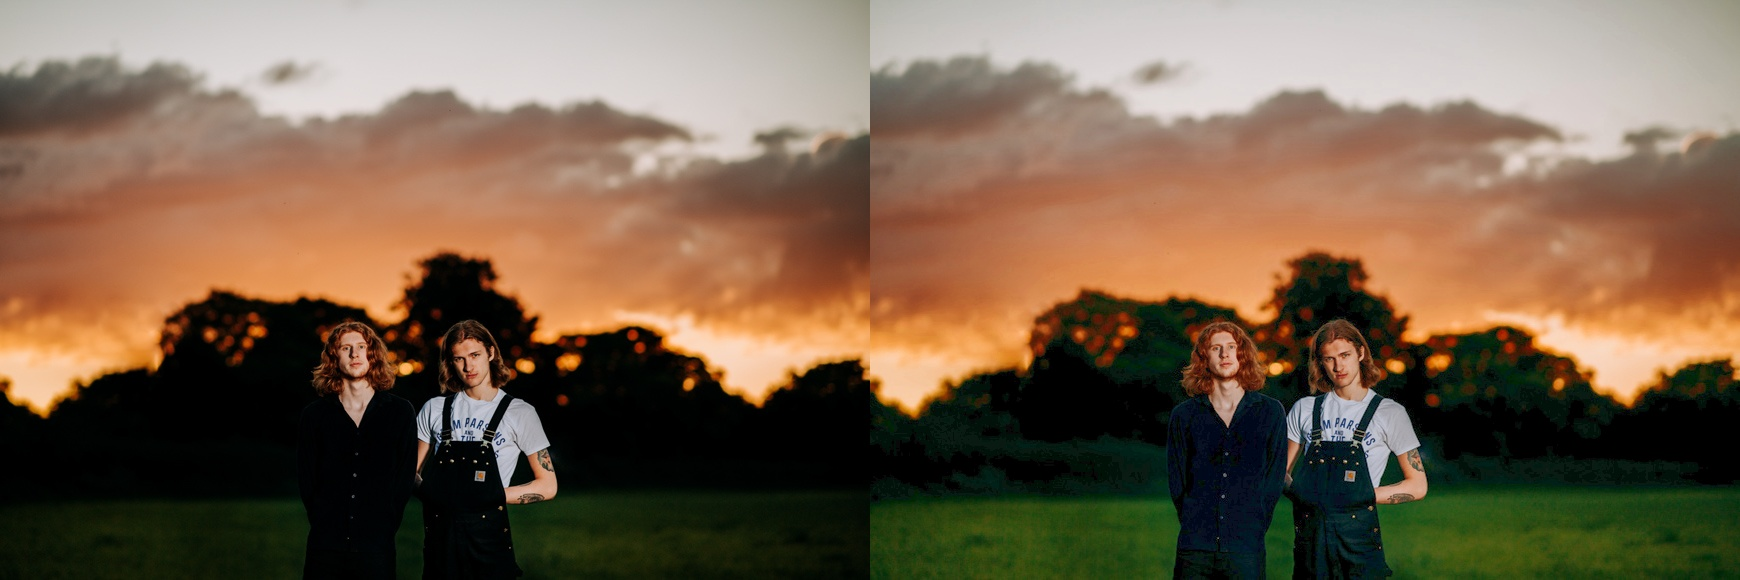

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read the image
image = cv2.imread('/content/backlighting-photography-5-output/backlighting-photography-5-jpg_final_comparison.jpg')

# Display the image
cv2_imshow(image)

In [ ]:
import math
import numpy as np
import torch


def cubic(x):
    """cubic function used for calculate_weights_indices."""
    absx = torch.abs(x)
    absx2 = absx**2
    absx3 = absx**3
    return (1.5 * absx3 - 2.5 * absx2 + 1) * (
        (absx <= 1).type_as(absx)) + (-0.5 * absx3 + 2.5 * absx2 - 4 * absx +
                                      2) * (((absx > 1) *
                                             (absx <= 2)).type_as(absx))


def calculate_weights_indices(in_length, out_length, scale, kernel,
                              kernel_width, antialiasing):
    """Calculate weights and indices, used for imresize function.

    Args:
        in_length (int): Input length.
        out_length (int): Output length.
        scale (float): Scale factor.
        kernel_width (int): Kernel width.
        antialisaing (bool): Whether to apply anti-aliasing when downsampling.
    """

    if (scale < 1) and antialiasing:
        # Use a modified kernel (larger kernel width) to simultaneously
        # interpolate and antialias
        kernel_width = kernel_width / scale

    # Output-space coordinates
    x = torch.linspace(1, out_length, out_length)

    # Input-space coordinates. Calculate the inverse mapping such that 0.5
    # in output space maps to 0.5 in input space, and 0.5 + scale in output
    # space maps to 1.5 in input space.
    u = x / scale + 0.5 * (1 - 1 / scale)

    # What is the left-most pixel that can be involved in the computation?
    left = torch.floor(u - kernel_width / 2)

    # What is the maximum number of pixels that can be involved in the
    # computation?  Note: it's OK to use an extra pixel here; if the
    # corresponding weights are all zero, it will be eliminated at the end
    # of this function.
    p = math.ceil(kernel_width) + 2

    # The indices of the input pixels involved in computing the k-th output
    # pixel are in row k of the indices matrix.
    indices = left.view(out_length, 1).expand(out_length, p) + torch.linspace(
        0, p - 1, p).view(1, p).expand(out_length, p)

    # The weights used to compute the k-th output pixel are in row k of the
    # weights matrix.
    distance_to_center = u.view(out_length, 1).expand(out_length, p) - indices

    # apply cubic kernel
    if (scale < 1) and antialiasing:
        weights = scale * cubic(distance_to_center * scale)
    else:
        weights = cubic(distance_to_center)

    # Normalize the weights matrix so that each row sums to 1.
    weights_sum = torch.sum(weights, 1).view(out_length, 1)
    weights = weights / weights_sum.expand(out_length, p)

    # If a column in weights is all zero, get rid of it. only consider the
    # first and last column.
    weights_zero_tmp = torch.sum((weights == 0), 0)
    if not math.isclose(weights_zero_tmp[0], 0, rel_tol=1e-6):
        indices = indices.narrow(1, 1, p - 2)
        weights = weights.narrow(1, 1, p - 2)
    if not math.isclose(weights_zero_tmp[-1], 0, rel_tol=1e-6):
        indices = indices.narrow(1, 0, p - 2)
        weights = weights.narrow(1, 0, p - 2)
    weights = weights.contiguous()
    indices = indices.contiguous()
    sym_len_s = -indices.min() + 1
    sym_len_e = indices.max() - in_length
    indices = indices + sym_len_s - 1
    return weights, indices, int(sym_len_s), int(sym_len_e)


@torch.no_grad()
def imresize(img, scale, antialiasing=True):
    """imresize function same as MATLAB.

    It now only supports bicubic.
    The same scale applies for both height and width.

    Args:
        img (Tensor | Numpy array):
            Tensor: Input image with shape (c, h, w), [0, 1] range.
            Numpy: Input image with shape (h, w, c), [0, 1] range.
        scale (float): Scale factor. The same scale applies for both height
            and width.
        antialisaing (bool): Whether to apply anti-aliasing when downsampling.
            Default: True.

    Returns:
        Tensor: Output image with shape (c, h, w), [0, 1] range, w/o round.
    """
    if type(img).__module__ == np.__name__:  # numpy type
        numpy_type = True
        img = torch.from_numpy(img.transpose(2, 0, 1)).float()
    else:
        numpy_type = False

    in_c, in_h, in_w = img.size()
    out_h, out_w = math.ceil(in_h * scale), math.ceil(in_w * scale)
    kernel_width = 4
    kernel = 'cubic'

    # get weights and indices
    weights_h, indices_h, sym_len_hs, sym_len_he = calculate_weights_indices(
        in_h, out_h, scale, kernel, kernel_width, antialiasing)
    weights_w, indices_w, sym_len_ws, sym_len_we = calculate_weights_indices(
        in_w, out_w, scale, kernel, kernel_width, antialiasing)
    # process H dimension
    # symmetric copying
    img_aug = torch.FloatTensor(in_c, in_h + sym_len_hs + sym_len_he, in_w)
    img_aug.narrow(1, sym_len_hs, in_h).copy_(img)

    sym_patch = img[:, :sym_len_hs, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    img_aug.narrow(1, 0, sym_len_hs).copy_(sym_patch_inv)

    sym_patch = img[:, -sym_len_he:, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    img_aug.narrow(1, sym_len_hs + in_h, sym_len_he).copy_(sym_patch_inv)

    out_1 = torch.FloatTensor(in_c, out_h, in_w)
    kernel_width = weights_h.size(1)
    for i in range(out_h):
        idx = int(indices_h[i][0])
        for j in range(in_c):
            out_1[j, i, :] = img_aug[j, idx:idx + kernel_width, :].transpose(
                0, 1).mv(weights_h[i])

    # process W dimension
    # symmetric copying
    out_1_aug = torch.FloatTensor(in_c, out_h, in_w + sym_len_ws + sym_len_we)
    out_1_aug.narrow(2, sym_len_ws, in_w).copy_(out_1)

    sym_patch = out_1[:, :, :sym_len_ws]
    inv_idx = torch.arange(sym_patch.size(2) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(2, inv_idx)
    out_1_aug.narrow(2, 0, sym_len_ws).copy_(sym_patch_inv)

    sym_patch = out_1[:, :, -sym_len_we:]
    inv_idx = torch.arange(sym_patch.size(2) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(2, inv_idx)
    out_1_aug.narrow(2, sym_len_ws + in_w, sym_len_we).copy_(sym_patch_inv)

    out_2 = torch.FloatTensor(in_c, out_h, out_w)
    kernel_width = weights_w.size(1)
    for i in range(out_w):
        idx = int(indices_w[i][0])
        for j in range(in_c):
            out_2[j, :, i] = out_1_aug[j, :,
                                       idx:idx + kernel_width].mv(weights_w[i])

    if numpy_type:
        out_2 = out_2.numpy().transpose(1, 2, 0)
    return out_2


def rgb2ycbcr(img, y_only=False):
    """Convert a RGB image to YCbCr image.

    This function produces the same results as Matlab's `rgb2ycbcr` function.
    It implements the ITU-R BT.601 conversion for standard-definition
    television. See more details in
    https://en.wikipedia.org/wiki/YCbCr#ITU-R_BT.601_conversion.

    It differs from a similar function in cv2.cvtColor: `RGB <-> YCrCb`.
    In OpenCV, it implements a JPEG conversion. See more details in
    https://en.wikipedia.org/wiki/YCbCr#JPEG_conversion.

    Args:
        img (ndarray): The input image. It accepts:
            1. np.uint8 type with range [0, 255];
            2. np.float32 type with range [0, 1].
        y_only (bool): Whether to only return Y channel. Default: False.

    Returns:
        ndarray: The converted YCbCr image. The output image has the same type
            and range as input image.
    """
    img_type = img.dtype
    img = _convert_input_type_range(img)
    if y_only:
        out_img = np.dot(img, [65.481, 128.553, 24.966]) + 16.0
    else:
        out_img = np.matmul(
            img, [[65.481, -37.797, 112.0], [128.553, -74.203, -93.786],
                  [24.966, 112.0, -18.214]]) + [16, 128, 128]
    out_img = _convert_output_type_range(out_img, img_type)
    return out_img


def bgr2ycbcr(img, y_only=False):
    """Convert a BGR image to YCbCr image.

    The bgr version of rgb2ycbcr.
    It implements the ITU-R BT.601 conversion for standard-definition
    television. See more details in
    https://en.wikipedia.org/wiki/YCbCr#ITU-R_BT.601_conversion.

    It differs from a similar function in cv2.cvtColor: `BGR <-> YCrCb`.
    In OpenCV, it implements a JPEG conversion. See more details in
    https://en.wikipedia.org/wiki/YCbCr#JPEG_conversion.

    Args:
        img (ndarray): The input image. It accepts:
            1. np.uint8 type with range [0, 255];
            2. np.float32 type with range [0, 1].
        y_only (bool): Whether to only return Y channel. Default: False.

    Returns:
        ndarray: The converted YCbCr image. The output image has the same type
            and range as input image.
    """
    img_type = img.dtype
    img = _convert_input_type_range(img)
    if y_only:
        out_img = np.dot(img, [24.966, 128.553, 65.481]) + 16.0
    else:
        out_img = np.matmul(
            img, [[24.966, 112.0, -18.214], [128.553, -74.203, -93.786],
                  [65.481, -37.797, 112.0]]) + [16, 128, 128]
    out_img = _convert_output_type_range(out_img, img_type)
    return out_img


def ycbcr2rgb(img):
    """Convert a YCbCr image to RGB image.

    This function produces the same results as Matlab's ycbcr2rgb function.
    It implements the ITU-R BT.601 conversion for standard-definition
    television. See more details in
    https://en.wikipedia.org/wiki/YCbCr#ITU-R_BT.601_conversion.

    It differs from a similar function in cv2.cvtColor: `YCrCb <-> RGB`.
    In OpenCV, it implements a JPEG conversion. See more details in
    https://en.wikipedia.org/wiki/YCbCr#JPEG_conversion.

    Args:
        img (ndarray): The input image. It accepts:
            1. np.uint8 type with range [0, 255];
            2. np.float32 type with range [0, 1].

    Returns:
        ndarray: The converted RGB image. The output image has the same type
            and range as input image.
    """
    img_type = img.dtype
    img = _convert_input_type_range(img) * 255
    out_img = np.matmul(img, [[0.00456621, 0.00456621, 0.00456621],
                              [0, -0.00153632, 0.00791071],
                              [0.00625893, -0.00318811, 0]]) * 255.0 + [
                                  -222.921, 135.576, -276.836
                              ]  # noqa: E126
    out_img = _convert_output_type_range(out_img, img_type)
    return out_img


def ycbcr2bgr(img):
    """Convert a YCbCr image to BGR image.

    The bgr version of ycbcr2rgb.
    It implements the ITU-R BT.601 conversion for standard-definition
    television. See more details in
    https://en.wikipedia.org/wiki/YCbCr#ITU-R_BT.601_conversion.

    It differs from a similar function in cv2.cvtColor: `YCrCb <-> BGR`.
    In OpenCV, it implements a JPEG conversion. See more details in
    https://en.wikipedia.org/wiki/YCbCr#JPEG_conversion.

    Args:
        img (ndarray): The input image. It accepts:
            1. np.uint8 type with range [0, 255];
            2. np.float32 type with range [0, 1].

    Returns:
        ndarray: The converted BGR image. The output image has the same type
            and range as input image.
    """
    img_type = img.dtype
    img = _convert_input_type_range(img) * 255
    out_img = np.matmul(img, [[0.00456621, 0.00456621, 0.00456621],
                              [0.00791071, -0.00153632, 0],
                              [0, -0.00318811, 0.00625893]]) * 255.0 + [
                                  -276.836, 135.576, -222.921
                              ]  # noqa: E126
    out_img = _convert_output_type_range(out_img, img_type)
    return out_img


def _convert_input_type_range(img):
    """Convert the type and range of the input image.

    It converts the input image to np.float32 type and range of [0, 1].
    It is mainly used for pre-processing the input image in colorspace
    convertion functions such as rgb2ycbcr and ycbcr2rgb.

    Args:
        img (ndarray): The input image. It accepts:
            1. np.uint8 type with range [0, 255];
            2. np.float32 type with range [0, 1].

    Returns:
        (ndarray): The converted image with type of np.float32 and range of
            [0, 1].
    """
    img_type = img.dtype
    img = img.astype(np.float32)
    if img_type == np.float32:
        pass
    elif img_type == np.uint8:
        img /= 255.
    else:
        raise TypeError('The img type should be np.float32 or np.uint8, '
                        f'but got {img_type}')
    return img


def _convert_output_type_range(img, dst_type):
    """Convert the type and range of the image according to dst_type.

    It converts the image to desired type and range. If `dst_type` is np.uint8,
    images will be converted to np.uint8 type with range [0, 255]. If
    `dst_type` is np.float32, it converts the image to np.float32 type with
    range [0, 1].
    It is mainly used for post-processing images in colorspace convertion
    functions such as rgb2ycbcr and ycbcr2rgb.

    Args:
        img (ndarray): The image to be converted with np.float32 type and
            range [0, 255].
        dst_type (np.uint8 | np.float32): If dst_type is np.uint8, it
            converts the image to np.uint8 type with range [0, 255]. If
            dst_type is np.float32, it converts the image to np.float32 type
            with range [0, 1].

    Returns:
        (ndarray): The converted image with desired type and range.
    """
    if dst_type not in (np.uint8, np.float32):
        raise TypeError('The dst_type should be np.float32 or np.uint8, '
                        f'but got {dst_type}')
    if dst_type == np.uint8:
        img = img.round()
    else:
        img /= 255.
    return img.astype(dst_type)

In [ ]:
import numpy as np


def reorder_image(img, input_order='HWC'):
    """Reorder images to 'HWC' order.

    If the input_order is (h, w), return (h, w, 1);
    If the input_order is (c, h, w), return (h, w, c);
    If the input_order is (h, w, c), return as it is.

    Args:
        img (ndarray): Input image.
        input_order (str): Whether the input order is 'HWC' or 'CHW'.
            If the input image shape is (h, w), input_order will not have
            effects. Default: 'HWC'.

    Returns:
        ndarray: reordered image.
    """

    if input_order not in ['HWC', 'CHW']:
        raise ValueError(
            f'Wrong input_order {input_order}. Supported input_orders are '
            "'HWC' and 'CHW'")
    if len(img.shape) == 2:
        img = img[..., None]
    if input_order == 'CHW':
        img = img.transpose(1, 2, 0)
    return img


def to_y_channel(img):
    """Change to Y channel of YCbCr.

    Args:
        img (ndarray): Images with range [0, 255].

    Returns:
        (ndarray): Images with range [0, 255] (float type) without round.
    """
    img = img.astype(np.float32) / 255.
    if img.ndim == 3 and img.shape[2] == 3:
        img = bgr2ycbcr(img, y_only=True)
        img = img[..., None]
    return img * 255.

In [ ]:
import cv2
import math
import numpy as np
from scipy.ndimage.filters import convolve
from scipy.special import gamma



def estimate_aggd_param(block):
    """Estimate AGGD (Asymmetric Generalized Gaussian Distribution) paramters.

    Args:
        block (ndarray): 2D Image block.

    Returns:
        tuple: alpha (float), beta_l (float) and beta_r (float) for the AGGD
            distribution (Estimating the parames in Equation 7 in the paper).
    """
    block = block.flatten()
    gam = np.arange(0.2, 10.001, 0.001)  # len = 9801
    gam_reciprocal = np.reciprocal(gam)
    r_gam = np.square(gamma(gam_reciprocal * 2)) / (
        gamma(gam_reciprocal) * gamma(gam_reciprocal * 3))

    left_std = np.sqrt(np.mean(block[block < 0]**2))
    right_std = np.sqrt(np.mean(block[block > 0]**2))
    gammahat = left_std / right_std
    rhat = (np.mean(np.abs(block)))**2 / np.mean(block**2)
    rhatnorm = (rhat * (gammahat**3 + 1) *
                (gammahat + 1)) / ((gammahat**2 + 1)**2)
    array_position = np.argmin((r_gam - rhatnorm)**2)

    alpha = gam[array_position]
    beta_l = left_std * np.sqrt(gamma(1 / alpha) / gamma(3 / alpha))
    beta_r = right_std * np.sqrt(gamma(1 / alpha) / gamma(3 / alpha))
    return (alpha, beta_l, beta_r)


def compute_feature(block):
    """Compute features.

    Args:
        block (ndarray): 2D Image block.

    Returns:
        list: Features with length of 18.
    """
    feat = []
    alpha, beta_l, beta_r = estimate_aggd_param(block)
    feat.extend([alpha, (beta_l + beta_r) / 2])

    # distortions disturb the fairly regular structure of natural images.
    # This deviation can be captured by analyzing the sample distribution of
    # the products of pairs of adjacent coefficients computed along
    # horizontal, vertical and diagonal orientations.
    shifts = [[0, 1], [1, 0], [1, 1], [1, -1]]
    for i in range(len(shifts)):
        shifted_block = np.roll(block, shifts[i], axis=(0, 1))
        alpha, beta_l, beta_r = estimate_aggd_param(block * shifted_block)
        # Eq. 8
        mean = (beta_r - beta_l) * (gamma(2 / alpha) / gamma(1 / alpha))
        feat.extend([alpha, mean, beta_l, beta_r])
    return feat


def niqe(img,
         mu_pris_param,
         cov_pris_param,
         gaussian_window,
         block_size_h=96,
         block_size_w=96):
    """Calculate NIQE (Natural Image Quality Evaluator) metric.

    Ref: Making a "Completely Blind" Image Quality Analyzer.
    This implementation could produce almost the same results as the official
    MATLAB codes: http://live.ece.utexas.edu/research/quality/niqe_release.zip

    Note that we do not include block overlap height and width, since they are
    always 0 in the official implementation.

    For good performance, it is advisable by the official implemtation to
    divide the distorted image in to the same size patched as used for the
    construction of multivariate Gaussian model.

    Args:
        img (ndarray): Input image whose quality needs to be computed. The
            image must be a gray or Y (of YCbCr) image with shape (h, w).
            Range [0, 255] with float type.
        mu_pris_param (ndarray): Mean of a pre-defined multivariate Gaussian
            model calculated on the pristine dataset.
        cov_pris_param (ndarray): Covariance of a pre-defined multivariate
            Gaussian model calculated on the pristine dataset.
        gaussian_window (ndarray): A 7x7 Gaussian window used for smoothing the
            image.
        block_size_h (int): Height of the blocks in to which image is divided.
            Default: 96 (the official recommended value).
        block_size_w (int): Width of the blocks in to which image is divided.
            Default: 96 (the official recommended value).
    """
    assert img.ndim == 2, (
        'Input image must be a gray or Y (of YCbCr) image with shape (h, w).')
    # crop image
    h, w = img.shape
    num_block_h = math.floor(h / block_size_h)
    num_block_w = math.floor(w / block_size_w)
    img = img[0:num_block_h * block_size_h, 0:num_block_w * block_size_w]

    distparam = []  # dist param is actually the multiscale features
    for scale in (1, 2):  # perform on two scales (1, 2)
        mu = convolve(img, gaussian_window, mode='nearest')
        sigma = np.sqrt(
            np.abs(
                convolve(np.square(img), gaussian_window, mode='nearest') -
                np.square(mu)))
        # normalize, as in Eq. 1 in the paper
        img_nomalized = (img - mu) / (sigma + 1)

        feat = []
        for idx_w in range(num_block_w):
            for idx_h in range(num_block_h):
                # process ecah block
                block = img_nomalized[idx_h * block_size_h //
                                      scale:(idx_h + 1) * block_size_h //
                                      scale, idx_w * block_size_w //
                                      scale:(idx_w + 1) * block_size_w //
                                      scale]
                feat.append(compute_feature(block))

        distparam.append(np.array(feat))
        # TODO: matlab bicubic downsample with anti-aliasing
        # for simplicity, now we use opencv instead, which will result in
        # a slight difference.
        if scale == 1:
            h, w = img.shape
            img = cv2.resize(
                img / 255., (w // 2, h // 2), interpolation=cv2.INTER_LINEAR)
            img = img * 255.

    distparam = np.concatenate(distparam, axis=1)

    # fit a MVG (multivariate Gaussian) model to distorted patch features
    mu_distparam = np.nanmean(distparam, axis=0)
    # use nancov. ref: https://ww2.mathworks.cn/help/stats/nancov.html
    distparam_no_nan = distparam[~np.isnan(distparam).any(axis=1)]
    cov_distparam = np.cov(distparam_no_nan, rowvar=False)

    # compute niqe quality, Eq. 10 in the paper
    invcov_param = np.linalg.pinv((cov_pris_param + cov_distparam) / 2)
    quality = np.matmul(
        np.matmul((mu_pris_param - mu_distparam), invcov_param),
        np.transpose((mu_pris_param - mu_distparam)))
    quality = np.sqrt(quality)

    return quality


def calculate_niqe(img, crop_border=0, input_order='HWC', convert_to='y'):
    """Calculate NIQE (Natural Image Quality Evaluator) metric.

    Ref: Making a "Completely Blind" Image Quality Analyzer.
    This implementation could produce almost the same results as the official
    MATLAB codes: http://live.ece.utexas.edu/research/quality/niqe_release.zip

    We use the official params estimated from the pristine dataset.
    We use the recommended block size (96, 96) without overlaps.

    Args:
        img (ndarray): Input image whose quality needs to be computed.
            The input image must be in range [0, 255] with float/int type.
            The input_order of image can be 'HW' or 'HWC' or 'CHW'. (BGR order)
            If the input order is 'HWC' or 'CHW', it will be converted to gray
            or Y (of YCbCr) image according to the ``convert_to`` argument.
        crop_border (int): Cropped pixels in each edge of an image. These
            pixels are not involved in the metric calculation.
        input_order (str): Whether the input order is 'HW', 'HWC' or 'CHW'.
            Default: 'HWC'.
        convert_to (str): Whether coverted to 'y' (of MATLAB YCbCr) or 'gray'.
            Default: 'y'.

    Returns:
        float: NIQE result.
    """

    # we use the official params estimated from the pristine dataset.
    niqe_pris_params = np.load('/content/niqe_pris_params.npz')
    mu_pris_param = niqe_pris_params['mu_pris_param']
    cov_pris_param = niqe_pris_params['cov_pris_param']
    gaussian_window = niqe_pris_params['gaussian_window']

    img = img.astype(np.float32)
    if input_order != 'HW':
        img = reorder_image(img, input_order=input_order)
        if convert_to == 'y':
            img = to_y_channel(img)
        elif convert_to == 'gray':
            img = cv2.cvtColor(img / 255., cv2.COLOR_BGR2GRAY) * 255.
        img = np.squeeze(img)

    if crop_border != 0:
        img = img[crop_border:-crop_border, crop_border:-crop_border]

    niqe_result = niqe(img, mu_pris_param, cov_pris_param, gaussian_window)

    return niqe_result

<ipython-input-21-226b428f5a56>:4: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [ ]:
img = cv2.imread('/content/enhanced_image.jpg')
calculate_niqe(img, crop_border=0, input_order='HWC', convert_to='y')

array([[5.15783913]])

In [ ]:
img = cv2.imread('/content/result/HD-wallpaper-saitama-one-punch-man-manga-hero-sensei-anime-jpg_colored_output.jpg')
calculate_niqe(img, crop_border=0, input_order='HWC', convert_to='y')

array([[4.13948372]])

In [ ]:
img = cv2.imread('/content/saitama-one-punch-man.png')
calculate_niqe(img, crop_border=0, input_order='HWC', convert_to='y')

# PSNR

In [ ]:
import cv2
import numpy as np

def compute_psnr(img1_path, img2_path):
    # Read images
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    # Convert images to float32
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)

    # Compute MSE (Mean Squared Error)
    mse = np.mean((img1 - img2) ** 2)

    # Calculate PSNR
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

    return psnr




In [ ]:
# Paths to the images
img1_path = '/content/HD-wallpaper-saitama-one-punch-man-manga-hero-sensei-anime.jpg'
img2_path = '/content/enhanced_image.jpg'

# Compute PSNR
psnr_value = compute_psnr(img1_path, img2_path)
print(f'PSNR value: {psnr_value:.2f} dB')

PSNR value: 4.68 dB


In [ ]:
# Paths to the images
img1_path = '/content/HD-wallpaper-saitama-one-punch-man-manga-hero-sensei-anime.jpg'
img2_path = '/content/result/HD-wallpaper-saitama-one-punch-man-manga-hero-sensei-anime-jpg_colored_output.jpg'

# Compute PSNR
psnr_value = compute_psnr(img1_path, img2_path)
print(f'PSNR value: {psnr_value:.2f} dB')

PSNR value: 17.12 dB


In [ ]:
# Paths to the images
img1_path = '/content/HD-wallpaper-saitama-one-punch-man-manga-hero-sensei-anime.jpg'
img2_path = '/content/saitama-one-punch-man.png'

# Compute PSNR
psnr_value = compute_psnr(img1_path, img2_path)
print(f'PSNR value: {psnr_value:.2f} dB')